## Human activity recognition problem

**Instructions**
1. The dataset consists of training and testing data in "train" and "test" folders. Use training data: X_train.txt labels: y_train.txt and testing data: X_test.txt   labels: y_test.txt. There are other files that also come with the dataset and may be useful in understanding the dataset better.

2. Please read the pdf file "dataset-paper.pdf" to answer Part 1.


### Part 1: Understanding the data

Answer the following questions briefly, after reading the paper 

* What is the objective of the data collection process?



* What human activity types does this dataset have? How many subjects/people have performed these activities?



* How many instances are available in the training and test sets? How many features are used to represent each instance? Summarize the type of features extracted in 2-3 sentences. 



* Describe briefly what machine learning model is used in this paper for activity recognition and how is it trained. How much is the maximum accuracy achieved?


## Part 2: K-Nearest Neighbour Classification

Build a K-Nearest Neighbor classfier for this data. 

* Let K take values from 1 to 50. For choosing the best K, use 10-fold cross-validation. Choose the best value of K based on model F1-score. 
* Show a plot of cross-validation accuracy with respect to K. 
* Using the best K value, evaluate the model performance on the supplied test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

## Part 3: Multiclass Logistic Regression with Elastic Net

Build an elastic-net regularized logistic regression classfier for this data.
* Elastic-net regularizer takes in 2 parameters: alpha and l1-ratio. Use the following values for alpha: 1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2. Use the following values for l1-ratio: 0,0.15,0.5,0.7,1. 

* Choose the best values of alpha and l1-ratio using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to alpha and l1-ratio values.

* Use the best value of alpha and l1-ratio to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

## Part 4: Support Vector Machine (RBF Kernel)

Build a SVM (with RBF Kernel) classfier for this data.
* SVM with RBF takes 2 parameters: gamma (length scale of the RBF kernel)  and C (the cost parameter). Use the following values for gamma: 1e-3, 1e-4. Use the following values for C: 1, 10, 100, 1000.

* Choose the best values of gamma and C using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to gamma and C.

* Use the best value of gamma and C to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

## Part 5: Random Forest

Build a Random forest classfier for this data.
* Random forest uses two parameters: the tree-depth for each decision tree and the number of trees. Use the following values for the tree-depth: 300,500,600. Use the following values for the number of trees: 200,500,700.

* Choose the best values of tree-depth and number of trees using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to tree-depth and number of trees.

* Use the best value of tree-depth and number of trees to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.


## Part 6: Discussion

Write a brief discussion about which classification method achieved the best performance. Your thoughts on the reason behind this. What method performed the worst? Could you do better or worse than the results in the dataset paper? Do you have any suggestions to further improve model performances?

# Solutions

### Importing Libraries

In [2]:
#Import the libraries
import numpy as np                                       #It is used for arrays, calculations and matrices
import pandas as pd                                      #It is used for reading and writing the csv files
import matplotlib.pyplot as plt                          #It is used for plotting graphs and charts
import random                                            #It is used for generating random numbers
from io import StringIO                                  #It is used to read and write to a string buffer
from sklearn.neighbors import KNeighborsClassifier       #It is a Classifier implementing the k-nearest neighbors vote
from sklearn import metrics                              #It is used for computation
from sklearn.metrics import *                            #It is used for computing accuracy,recalll,f1-score
from sklearn.cross_validation import cross_val_score     #It is used for calculating the cross validation score
from sklearn.linear_model import *                       #It is used for implementing regression
%matplotlib inline

### Reading Text Files

Here we are going to read the training and test files using genfromtxt under numpy. It loads the text files into the variables X_train, y_train, X_test and y_test.

In [3]:
X_train=np.genfromtxt("X_train.txt")
y_train=np.genfromtxt("y_train.txt")
X_test=np.genfromtxt("X_test.txt")
y_test=np.genfromtxt("y_test.txt")

#print x_train.shape
#print y_train.shape
#print x_test.shape
#print y_test.shape'''

# Part 1 - Understanding the Data Solution

### Data Collection Process

The main objective of data collection process is to understand the human behaviour based on the observations provided for the person and the surrounding environment. It is also necessary because :

1. We need to understand the relation bewtween the data and the analysis.

2. Planning process of the data is an important factor.

3. To understand the human factors, we need to collect the data with the proper planing and undersatnding as it would be further used for the analysis.

### Human Activity

Human activity in this dataset is Human Activity Recognition(HAR). A group of 30 volunteers with ages ranging 19 to 48 have performed these activities. The six selected ADL were Standing, Sitting, Laying Down, Walking, Walking Downstairs and Walking Upstairs.

With a time gap of 5 seconds, each subject test is perfomed 2 times.

### Instances and Features

Instances Available in Training data set and Testing data set are:

In [7]:
print "Instances in training data set are:",len(X_train)
print
print "Instances in testing data set are:",len(X_test)

Instances in training data set are: 7352

Instances in testing data set are: 2947


Features used to represent each instance are:

In [8]:
print "Features used to represent each instances in training data set are:",len(X_train.T)
print
print "Features used to represent each instances in testing data set are:",len(X_test.T)

Features used to represent each instances in training data set are: 561

Features used to represent each instances in testing data set are: 561


### Types of features

Type of features used were:

1. For each sample window a vector of features was used.

2. For feature mapping standard measures such as mean, correaltion, signal magnitude area and autoregression coefficients were used.

3. New features such as energy of different bands, frequency skewness and angle between vectors were used in order to improve the learning frequency.

### Machine Learning Model

Machine learning model used in this paper is Support Vector Machine(SVM) binary classifiers which were generlaized to the multiclass case through One-Vs-All approach. SVM hyperparameters were selected using 10-fold cross validation procedure. Dynamic activities using newly introduced features were taken into consideration to train the data.

Maximum accuracy achieved in this process was 96% for the test data which was composed of 2947 features.

# Part 2 - K-Nearest Neighbour Classification Solution

### Choosing Besk K value

Using the 10-fold cross validation and taking K values from 0 to 50, we will choose the best K value based on the model F1-score. Basically for the best f1-score, we will pick up the best K value.

In [33]:
def knearestClassification():
    i=1
    f1_score=[]
    cross_val_acc_score=[]
    while i<51:
        
        #Using Kneighbour Classifier to fit the data
        knclassfier= KNeighborsClassifier(n_neighbors=i)
        knclassfier.fit(X_train,y_train)
        
        #Using the cross validation score to compute the f1-score
        f1_score.append(np.mean(cross_val_score(knclassfier,X_train,y_train,cv=10,scoring='f1_micro')))
        
        cross_val_acc_score.append(np.mean(cross_val_score(knclassfier,X_train,y_train,cv=10,scoring='accuracy')))
        
        i+=1
    best_k=np.argmax(f1_score)+1
    return best_k,f1_score,cross_val_acc_score

Calling the above defined function.

In [34]:
best_k,f1_score,cross_val_acc_score = knearestClassification()

print "F1-score for k values are: {}".format(f1_score)
print
print "Best K value based on F1-score is: {}".format(best_k)
print 
print"Cross validation accuracy score is: {}".format(cross_val_acc_score)

F1-score for k values are: [0.89219979370323033, 0.88049779330164346, 0.90363477684829829, 0.90159282068328062, 0.90744195337821432, 0.90607916166303237, 0.9077172305111525, 0.90976064244850785, 0.90649069665790216, 0.91030024417828348, 0.90826053041217492, 0.90880344655395129, 0.90717207186761384, 0.90921124666051478, 0.90853319281584477, 0.90676742596313298, 0.90730277995419362, 0.90743512864706377, 0.90757174318745926, 0.9086590794922611, 0.90716523710348773, 0.9056701022320619, 0.90635723779773869, 0.90526656901335656, 0.90581319639805891, 0.90512866147014215, 0.90526249655455415, 0.90389879059984302, 0.90267799393616888, 0.90321832357275633, 0.90376737225682935, 0.90376643641146581, 0.90376199676223268, 0.90335068585747202, 0.90308320150125476, 0.90226075597091593, 0.90281071335778029, 0.90280867991725167, 0.90335272735316452, 0.90294344335309307, 0.9011813827267916, 0.90280960672879762, 0.90159066168978796, 0.90158825198389181, 0.90186091944519653, 0.90185832838197988, 0.90009274

### Plot of Cross Validation Accuracy 

We have computed the F1-score based on the cross validation score. Now we will plot the cross validation accuracy with respect to the K value.

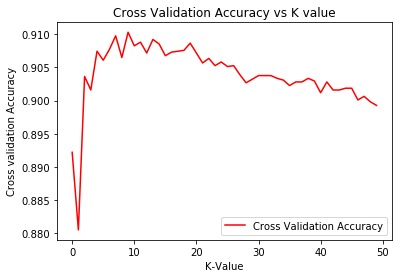

In [41]:
Kvalue=range(0,len(f1_score))                                      #Creating a range of K values from 0 to 50

plt.plot(Kvalue,f1_score,color='r',label='Cross Validation Accuracy')

plt.xlabel('K-Value')
plt.ylabel('Cross validation Accuracy')
plt.title('Cross Validation Accuracy vs K value')
plt.legend(loc="lower right")

### Evaluating Model Performance With Best K value

Using the best K value, we are going to evaluate the model performance on the test set. We will also compute the confusion matrix, multi class averaged f1-score and accuracy. 

In [42]:
#Using Kneighbours with best K-value
knclassfier= KNeighborsClassifier(n_neighbors=best_k)
knclassfier.fit(X_train,y_train)

cm=confusion_matrix(y_test,knclassfier.predict(X_test))                 #Computing confusion matrix

TP = np.diag(cm)                                                         #Computing the True Positive
FP = cm.sum(axis=0) - np.diag(cm)                                        #Computing the False Positive
FN = cm.sum(axis=1) - np.diag(cm)                                        #Computing the False Negative
TN = cm.sum() - (FP + FN + TP)                                           #Computing the True Negative

i=0

#Creating an empty array for accuracy, reacall, precision and f1-score
acc=[]
f1_score=[]
prec=[]
recall=[]

while i in range(0,6):                                                   #As there are 6 classes in the dataset
    acc.append(float(TP[i]+TN[i])/float(TP[i]+FP[i]+FN[i]+TN[i])*100)    #Computing the accuracy for each class
    prec.append(float(TP[i])/float(TP[i]+FP[i]))                         #Computing the precision for each class
    recall.append(float(TP[i])/float(TP[i]+FN[i]))                       #Computing the recall for each class
    f1_score.append(2*((prec[i]*recall[i])/(prec[i]+recall[i])))         #Calculating the f1_score for each class
    i+=1
    
print "Multi class averaged f1 score is: {}".format(np.mean(f1_score))
print
print "Multi class averaged Accuracy is: {}".format(np.mean(acc))
print
print "Confusion matrix:\n",cm

Multi class averaged f1 score is: 0.903807934961

Multi class averaged Accuracy is: 96.8894921389

Confusion matrix:
[[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]


# Part 3 - Multi class logistic regression- Elastics Net Solutions

### Choosing Best Alpha and L1-Ratio Value

Here we are going to choose the best alpha and l1-ratio value based on the highest f1-score. We are using the elastic-net regularized logistic regression classfier to build the model and then using the 10-fold cross validation to compute the f1-score.

In [44]:
def elasticnetClassifier(alpha,l1):
    f1_score=[]
    arr_seq=np.zeros((1,1),dtype=object)
    
    #Fitting the data using the SGDClassifier
    enet=SGDClassifier(loss='log',penalty='elasticnet',alpha=alpha,l1_ratio=l1).fit(X_train,y_train)
    
    #Creating an array of alpha and l1 value
    arr_seq=np.matrix([alpha,l1])
    
    f1_score.append(np.mean(cross_val_score(enet,X_train,y_train,cv=10,scoring='f1_micro')))
    return [f1_score,arr_seq]

In [45]:
alpha_val=[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
l1_val=[0,0.15,0.5,0.7,1]

arr_seq=np.zeros((6,5),dtype=object)

f1_score=[]

i=0
j=0

for i in range(0,6):
        j=0
        while j<5:
            result = elasticnetClassifier(alpha_val[i],l1_val[j])                    #Calling the function
            f1_score.append(result[0])                                               #Storing the f1-score
            arr_seq[i,j]=result[1]                                                   #Storing the alpha and l1 values
            j+=1
        i+=1

Here, we will find the index of highest f1-score and then we will extract the alpha and l1 value for the best result.

In [46]:
index= np.argmax(f1_score)                                #Index of highest f1-score

alpha_max=(arr_seq[index/5][index%5])[0,0]                    #Finding the alpha max

l1_max=(arr_seq[index/5][index%5])[0,1]                       #Finding the l1 max

print "Best value of alpha is : {}".format(alpha_max)
print "Best value of l1 is : {}".format(l1_max)

Best value of alpha is : 0.001
Best value of l1 is : 0.5


### Surface Plot

Now, we will plot the surface plot of F1 score with respect to alpha and l1 values.

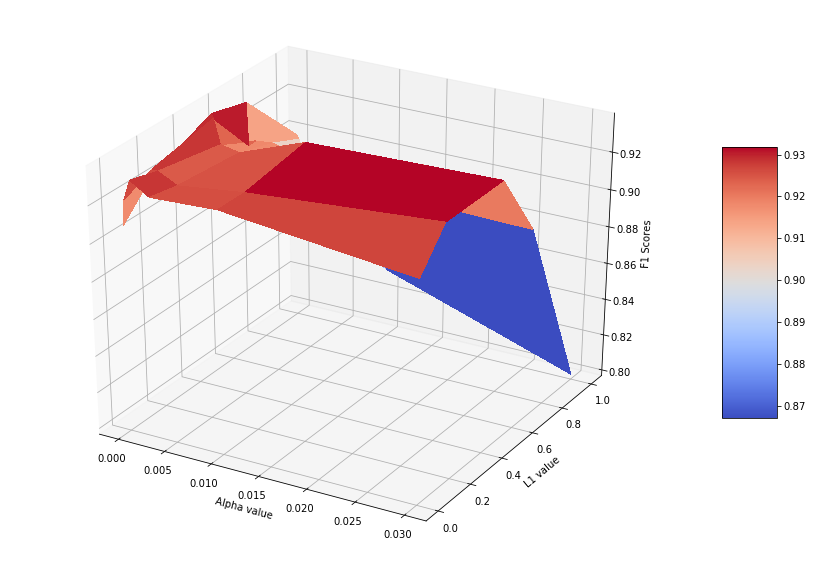

In [47]:
# Surface plot for Multi class logistic regression

#Importing libraries for surface plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

x=np.array(alpha)                                 #creating 1d array of alpha values
y=np.array(l1)                                    #creating 1d array of l1 values

x,y=np.meshgrid(x,y)                              #creating a mesh grip with alpha and l1 value

z= np.array(f1_score).reshape(5,6)                #creating the z values with the f1 score

plot= ax.plot_surface(x,y,z,linewidth=0.5, antialiased=False,cmap=cm.coolwarm)
fig.colorbar(plot, shrink=0.5, aspect=5)
fig.set_size_inches(15, 10, forward=True)

ax.set_xlabel('Alpha value')
ax.set_ylabel('L1 value')
ax.set_zlabel('F1 Scores')

plt.show()

### Retraining Model with best Alpha and L1-Ratio

As we have computed the best alpha and l1 value, we will now retrain our model using training set and predict the labels of the test set with the best values and compute the confusion matrix, multi weighted average f1 score and accuracy.

In [56]:
def retrainelasticnetClassifier(alpha_max,l1_max):
    
    enet=SGDClassifier(loss='log',penalty='elasticnet',alpha=alpha_max,l1_ratio=l1_max)
    enet.fit(X_train,y_train)
    
    cm=confusion_matrix(y_test,enet.predict(X_test))

    TP = np.diag(cm)                                                         #Computing the True Positive
    FP = cm.sum(axis=0) - np.diag(cm)                                        #Computing the False Positive
    FN = cm.sum(axis=1) - np.diag(cm)                                        #Computing the False Negative
    TN = cm.sum() - (FP + FN + TP)                                            #Computing the True Negative
    
    i=0
    
    #Creating an empty array for accuracy, precision, recall and f1-score
    acc=[]
    f1_score=[]
    prec=[]
    recall=[]
    
    while i in range(0,6):                                                   #As there are 6 classes in the dataset
        acc.append(float(TP[i]+TN[i])/float(TP[i]+FP[i]+FN[i]+TN[i])*100)    #Computing the accuracy for each class
        prec.append(float(TP[i])/float(TP[i]+FP[i]))                         #Computing the precision for each class
        recall.append(float(TP[i])/float(TP[i]+FN[i]))                       #Computing the recall for each class
        f1_score.append(2*((prec[i]*recall[i])/(prec[i]+recall[i])))         #Calculating the f1_score for each class
        i+=1
        
    print "Multi class averaged f1 score:",np.mean(f1_score)
    print
    print "Multi class averaged Accuracy is:",np.mean(acc)
    print
    print "Confusion matrix:\n",cm

In [57]:
retrainelasticnetClassifier(alpha_max,l1_max)

Multi class averaged f1 score: 0.946736520419

Multi class averaged Accuracy is: 98.2468046601

Confusion matrix:
[[486   6   4   0   0   0]
 [ 32 429   9   1   0   0]
 [  8  15 396   0   1   0]
 [  0   3   0 432  56   0]
 [  2   0   0  18 512   0]
 [  0   0   0   0   0 537]]


# Part 4 - Support Vector Machine (RBF Kernel) Solutions

### Choosing best value of Gamma and C

Here we are building the SVM with RBF kernel using the different values of gamma and C. We are applying the 10 fold cross validation and will choose the best gamma and C value based on the highest f1-score. 

In [67]:
from sklearn import svm

def supportVectorRBF(gamma,C):
        
        f1_score=[]
        arr_seq=np.zeros((1,1),dtype=object)
        
        #Using the SVM using RBF
        svc_model = svm.SVC(kernel='rbf', gamma=gamma, C=C)
        svc_model.fit(X_train,y_train)
        
        #Creating an array for gamma and c values
        arr_seq=np.matrix([gamma,C])
        
        f1_score.append(np.mean(cross_val_score(svc_model,X_train,y_train,cv=10,scoring='f1_micro')))
    
        return [f1_score,arr_seq] 

Calling the above function with different values of gamma and c.

In [73]:
gamma=[1e-3,1e-4]
C=[1,10,100,1000]

f1_score=[]
arr_seq=np.zeros((2,4),dtype=object)

i=0
j=0

while i< 2:
    j=0
    while j<4:
            result = supportVectorRBF(gamma[i],C[j])                         #Calling the above function
            f1_score.append(result[0])                                       #Storing the f1 score
            arr_seq[i,j]=result[1]                                           #Storing the gamma and c values
            j+=1
    i+=1

Now, we will extract the best gamma and C value based on the best f1-score.

In [76]:
index= np.argmax(f1_score)                                                  #Finding the index of highest f1 score

gamma_max=(arr_seq[index/4][index%4])[0,0]                                  #Extracting the best gamma value

C_max=(arr_seq[index/4][index%4])[0,1]                                      #Extracting the best c value

print "Best value of gamma is:",gamma_max
print "Best value of C is:",C_max

Best value of gamma is: 0.001
Best value of C is: 1000.0


## Plotting Surface Plot

Here we are plotting a surface plot of F1-score with respect to gamma and c.

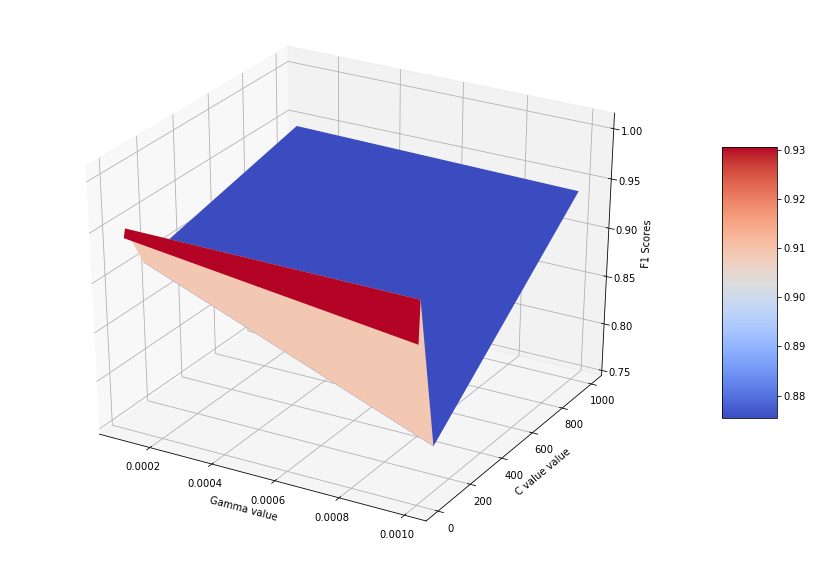

In [77]:
#Surface plot for SVM

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')


x=np.array(gamma).ravel()
y=np.array(C).ravel()
x,y=np.meshgrid(x,y)
z=np.array(f1_score).reshape(4,2)

plot= ax.plot_surface(x,y,z,linewidth=0.5, cmap=cm.coolwarm)
ax.set_zlim(0.75, 1.01)
fig.colorbar(plot, shrink=0.5, aspect=5)
fig.set_size_inches(15, 10, forward=True)

ax.set_xlabel('Gamma value')
ax.set_ylabel('C value')
ax.set_zlabel('F1 Scores')

plt.show()

### Retraining Model using best gamma and c value

Using the best values of gamma and C, we will retrain our model on training set and use it to predict the labels on test data. We will also compute the confusion matrix, multi class averaged f1-score and accuracy. 

In [92]:
def retrainingRBF(gamma,C):
    gamma=float(gamma)
    svc_model = svm.SVC(kernel='rbf', gamma=gamma, C=C)

    svc_model.fit(X_train,y_train)
    
    cm=confusion_matrix(y_test,svc_model.predict(X_test))

    TP = np.diag(cm)                                                         #Computing the True Positive
    FP = cm.sum(axis=0) - np.diag(cm)                                        #Computing the False Positive
    FN = cm.sum(axis=1) - np.diag(cm)                                        #Computing the False Negative
    TN = cm.sum() - (FP + FN + TP)                                            #Computing the True Negative

    i=0

    #Creating an empty array for accuracy, precision, recall and f1-score
    acc=[]
    f1_score=[]
    prec=[]
    recall=[]

    while i in range(0,6):                                                     #As there are 6 classes in the dataset
        acc.append(float(TP[i]+TN[i])/float(TP[i]+FP[i]+FN[i]+TN[i])*100)    #Computing the accuracy for each class
        prec.append(float(TP[i])/float(TP[i]+FP[i]))                         #Computing the precision for each class
        recall.append(float(TP[i])/float(TP[i]+FN[i]))                       #Computing the recall for each class
        f1_score.append(2*((prec[i]*recall[i])/(prec[i]+recall[i])))         #Calculating the f1_score for each class
        i+=1

    print "Multi class averaged f1 score:",np.mean(f1_score)
    print
    print "Multi class averaged Accuracy is:",np.mean(acc)
    print
    print "Confusion matrix:\n",cm

Calling the above function with best gamma and c value.

In [93]:
retrainingRBF(gamma_max,C_max)

Multi class averaged f1 score: 0.965767519546

Multi class averaged Accuracy is: 98.8575952946

Confusion matrix:
[[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


# Part 5 - Random Forest Solutions

### Choosing best tree depth and number of trees value

Here we are building the random forest classifier using the two parameters that are tree depth and number of trees. Based on the best f1-score, we will extract the best tree depth and number of trees value.

In [13]:
from sklearn.ensemble import RandomForestClassifier

def randomforestClassifier(tree_depth,num_trees):
    f1_score=[]
    arr_seq=np.zeros((1,1),dtype=object)
    
    #Building the random forest classifier and fitting the data
    rfclf = RandomForestClassifier(n_estimators=num_trees, max_depth=tree_depth, random_state=42)
    rfclf.fit(X_train,y_train)
    
    #Creating an array for tree depth and number of tees
    arr_seq=np.matrix([tree_depth,num_trees])
    
    f1_score.append(np.mean(cross_val_score(rfclf,X_train,y_train,cv=10,scoring='f1_micro')))

    return [f1_score,arr_seq]

Calling the above function.

In [14]:
tree_depth=[300,500,600]
num_trees=[200,500,700]
f1_score=[]
arr_seq=np.zeros((3,3),dtype=object)
i=0
j=0

while i<3:
    j=0
    while j<3:
        result = randomforestClassifier(tree_depth[i],num_trees[j])                 #Calling the above function
        f1_score.append(result[0])                                                  #Extracting the f1-score
        arr_seq[i,j]=result[1]                                                      #Extracting the tree depth and num of trees
        j+=1
    i+=1

Finding the best tree depth and number of tree value based on f1 score.

In [15]:
index= np.argmax(f1_score)                                                        #Finding the index of best f1-score
tree_depth_max=(arr_seq[index/3][index%3])[0,0]                                   #Extracting the best tree depth value
num_tree_max=(arr_seq[index/3][index%3])[0,1]                                     #Extracting the best num tree value
print "Best value of tree depth is: ",tree_depth_max
print "Best value of number of trees is: ",num_tree_max

Best value of tree depth is:  300
Best value of number of trees is:  700


### Plotting Surface Plot

Here we are plotting the F1 score with respect to the tree depth and the f1-score.

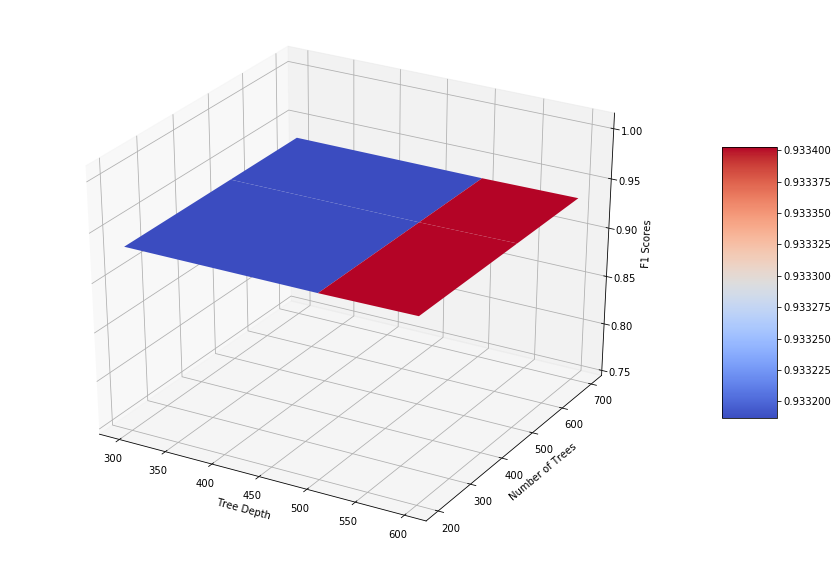

In [16]:
#Surface plot for Random Forest Classifier

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

x=np.array(tree_depth)
y=np.array(num_trees)
x,y=np.meshgrid(x,y)
z=np.array(f1_score).reshape(3,3)

plot= ax.plot_surface(x,y,z,linewidth=0.5, cmap=cm.coolwarm)

ax.set_zlim(0.75, 1.01)

fig.colorbar(plot, shrink=0.5, aspect=5)
fig.set_size_inches(15, 10, forward=True)

ax.set_xlabel('Tree Depth')
ax.set_ylabel('Number of Trees')
ax.set_zlabel('F1 Scores')

plt.show()

### Retraining the model with best tree depth and number of trees value

Using the best tree depth and number of trees values, we are retraining our training model and will use it to predict the lables of test data. We will also compute the confusion matrix, multi-class average f1 score and accuracy.

In [19]:
def retrainRandomForest(num_tree,tree_depth):
    rfclf = RandomForestClassifier(n_estimators=num_tree, max_depth=tree_depth, random_state=42)
    rfclf.fit(X_train,y_train)

    cm=confusion_matrix(y_test,rfclf.predict(X_test))

    TP = np.diag(cm)                                                         #Computing the True Positive
    FP = cm.sum(axis=0) - np.diag(cm)                                        #Computing the False Positive
    FN = cm.sum(axis=1) - np.diag(cm)                                        #Computing the False Negative
    TN = cm.sum() - (FP + FN + TP)                                            #Computing the True Negative

    i=0

    #Creating an empty array for accuracy, precision, recall and f1-score
    acc=[]
    f1_score=[]
    prec=[]
    recall=[]

    while i in range(0,6):                                                     #As there are 6 classes in the dataset
        acc.append(float(TP[i]+TN[i])/float(TP[i]+FP[i]+FN[i]+TN[i])*100)    #Computing the accuracy for each class
        prec.append(float(TP[i])/float(TP[i]+FP[i]))                         #Computing the precision for each class
        recall.append(float(TP[i])/float(TP[i]+FN[i]))                       #Computing the recall for each class
        f1_score.append(2*((prec[i]*recall[i])/(prec[i]+recall[i])))         #Calculating the f1_score for each class
        i+=1

    print "Multi class averaged f1 score:",np.mean(f1_score)
    print "Multi class averaged Accuracy is:",np.mean(acc)
    print "Confusion matrix:\n",cm

Calling the above function.

In [20]:
retrainRandomForest(num_tree_max,tree_depth_max)

Multi class averaged f1 score: 0.924733237216
Multi class averaged Accuracy is: 97.5568374618
Confusion matrix:
[[482   6   8   0   0   0]
 [ 33 432   6   0   0   0]
 [ 20  45 355   0   0   0]
 [  0   0   0 435  56   0]
 [  0   0   0  42 490   0]
 [  0   0   0   0   0 537]]


# Part 6 - Discussion

For the given data set, we have performed various machine learning algorithms like K-Nearest Neighbour Classification, Multi Class Logistic Regression, Support Vector Machine using RBF and Random Forest Classifier. For each machine learning algorithm, we have computed the F1-score and accuracy. Based on each algorithm performance, we can judge which machine learning classifier has given the best performance:

<table align="left">
<tr>
<td>Model Name</td>
<td>Accuracy</td>
<td>F1-Score</td>
</tr>
<tr>
<td>K-Nearest Neighbour</td>
<td>96.88%</td>
<td>0.93</td>
</tr>
<tr>
<td>Multi Class Logisitic Regression</td>
<td>98.24%</td>
<td>0.946</td>
</tr>
<tr>
<td>SVM</td>
<td>98.85%</td>
<td>0.965</td>
</tr>
<tr>
<td>Random Forest Tree</td>
<td>97.55%</td>
<td>0.924</td>
</tr>
</table>

<br><br><br><br><br><br><br>From the above table, we can see that Support Vector Machine using RBF has given the best performance with 98.85% accuracy score if compared to the other machine learning algorithms in terms of both accuracy score and f1-score for the unseen data and produced the best fit for the given data. Good model selection that is choice of kernel and hyper-parameter tuning may be the reason for good performance from SVM, as we need to set the parameters and the output may change with each value.

We can't say directly comment on the alogirthm that performed worst for this dataset. Based on the f1-score and the accuracy score, we cannot compare the algorithms. We need to judge the other parameters as well like time. When I ran the Random Forest Classifier, though it gave me 97.55% accuracy and 96.5% f1-score which is really good when compared to other algorithms but in return it consumed a lot of time. If we would have reduced the tree depth and the number of trees, may be that would have not consumed more time and given the best output.

As discussed in the paper, SVM model with the cross fold validation has been used. It uses the entire dataset for training and testing the model. It produced better result and was able to achieve the highest accuracy and f1-score.

### Improve Model Performances

There are several ways through which we can improve the performance of a machine learning model. It depends on the problem and obviously an individual approach. Performance can be increased by doing following things:

1. By adding more data, basically increasing the size of the dataset as it can learn from its own data.

2. It is always a good approach to treat the missing and outlier data as it can boost the accuracy. Missing values can be filled up by either using mean, median or mode.

3. Applying feature engineering by neither transforming or creating a feature. Normalizing the data and usually scaling it between 0 and 1 is also a good approach as good hypothesis always results in good features.

4. Feature selection should be used so as to find the best subsets for the given datasets as they can explain the relation between independent variables and target varaiables.

5. Using multiple algorithms as some algorithms are best suited for a specific dataset.

4. Tuning the algorithm parameter as it can improve the accuracy of the model. It can be repeated multiple times so as to get the desired result.

5. Combining the results of multiple weak models for producing the results using bagging and boosting.

6. To use cross validation techinque while using a machine learning algorithm is always a good approach.